Epoch: 0050 cost= 0.906279981 W= 2.06318 b= 0.709895
Epoch: 0100 cost= 0.769910216 W= 2.02214 b= 0.961061
Epoch: 0150 cost= 0.662154675 W= 1.94847 b= 1.18182
Epoch: 0200 cost= 0.569518924 W= 1.87963 b= 1.38638
Epoch: 0250 cost= 0.489843458 W= 1.81578 b= 1.57608
Epoch: 0300 cost= 0.421314359 W= 1.75657 b= 1.75202
Epoch: 0350 cost= 0.362372428 W= 1.70166 b= 1.91519
Epoch: 0400 cost= 0.311676383 W= 1.65073 b= 2.06651
Epoch: 0450 cost= 0.268072605 W= 1.60349 b= 2.20686
Epoch: 0500 cost= 0.230569571 W= 1.55969 b= 2.33701
Epoch: 0550 cost= 0.198312998 W= 1.51907 b= 2.45771
Epoch: 0600 cost= 0.170569137 W= 1.48139 b= 2.56966
Epoch: 0650 cost= 0.146706477 W= 1.44645 b= 2.67348
Epoch: 0700 cost= 0.126182526 W= 1.41404 b= 2.76976
Epoch: 0750 cost= 0.108529814 W= 1.38399 b= 2.85906
Epoch: 0800 cost= 0.093346655 W= 1.35612 b= 2.94187
Epoch: 0850 cost= 0.080287471 W= 1.33027 b= 3.01867
Epoch: 0900 cost= 0.069055252 W= 1.3063 b= 3.0899
Epoch: 0950 cost= 0.059394367 W= 1.28407 b= 3.15596
Epoch: 1000 

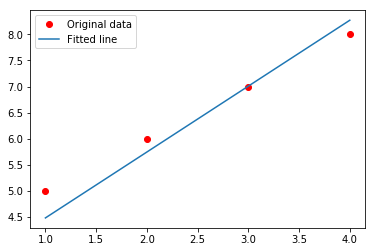

In [2]:
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
import tensorflow as tf

learning_rate = 0.01
training_epochs = 1000
display_step = 50

train_X = numpy.asarray([1.,2.,3.,4.])
train_Y = numpy.asarray([5.,6.,7.,8.])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()